In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

#colab
#from google.colab import drive
#from google.colab import userdata

#drive.mount('/content/drive')

In [2]:
#path = userdata.get('mitbih_train')
path = './datasets/mitbih_train.csv'
df = pd.read_csv(path, header=None)
df.rename(columns={187:"label"}, inplace=True) #renombrar la columna de label

El dataset está compuesto por 187 varaibles que representan un latido de un electrocardiograma entre [R-R]  y una columna de label que representa el tipo de latido, como se muestra en la siguente figura:

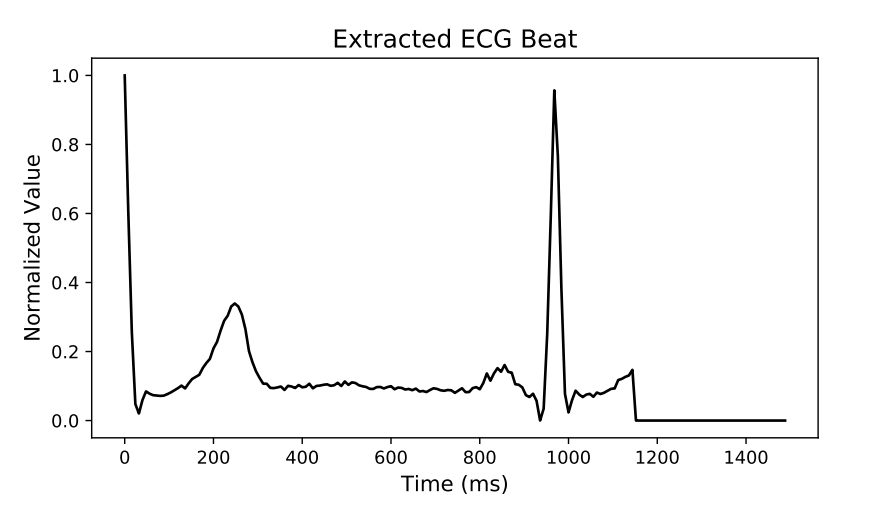


Las labels son: ['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]

N: Latidos normales y bloqueos

S: Latidos supraventriculares anormales

V: Latidos ventriculares anormales

F: Latidos fusionados

Q: Latidos artificiales o no clasificados







Nota: Para entender los datos podemos ver el siguiente  [paper](https://arxiv.org/pdf/1805.00794)

# Exploratory Data Analysis

## Exploración inicial del dataset:


In [3]:
df.shape

(87554, 188)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, 0 to label
dtypes: float64(188)
memory usage: 125.6 MB


In [5]:
df.describe()

0             1             2             3             4  \
count  87554.000000  87554.000000  87554.000000  87554.000000  87554.000000   
mean       0.890360      0.758160      0.423972      0.219104      0.201127   
std        0.240909      0.221813      0.227305      0.206878      0.177058   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.921922      0.682486      0.250969      0.048458      0.082329   
50%        0.991342      0.826013      0.429472      0.166000      0.147878   
75%        1.000000      0.910506      0.578767      0.341727      0.258993   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                  5             6             7             8             9  \
count  87554.000000  87554.000000  87554.000000  87554.000000  87554.000000   
mean       0.210399      0.205808      0.201773      0.198691      0.196757   
std        0.171909      0.178481      0.177240      0.171778      0.168357   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.088416      0.073333      0.066116      0.065000      0.068639   
50%        0.158798      0.145324      0.144424      0.150000      0.148734   
75%        0.287628      0.298237      0.295391      0.290832      0.283636   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

       ...           178           179           180           181  \
count  ...  87554.000000  87554.000000  87554.000000  87554.000000   
mean   ...      0.005025      0.004628      0.004291      0.003945   
std    ...      0.044154      0.042089      0.040525      0.038651   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.000000   
50%    ...      0.000000      0.000000      0.000000      0.000000   
75%    ...      0.000000      0.000000      0.000000      0.000000   
max    ...      1.000000      1.000000      1.000000      1.000000   

                182           183           184           185           186  \
count  87554.000000  87554.000000  87554.000000  87554.000000  87554.000000   
mean       0.003681      0.003471      0.003221      0.002945      0.002807   
std        0.037193      0.036255      0.034789      0.032865      0.031924   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

              label  
count  87554.000000  
mean       0.473376  
std        1.143184  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        4.000000  

[8 rows x 188 columns]

## Análisis de los labels

In [6]:
df["label"].value_counts()

label
0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: count, dtype: int64

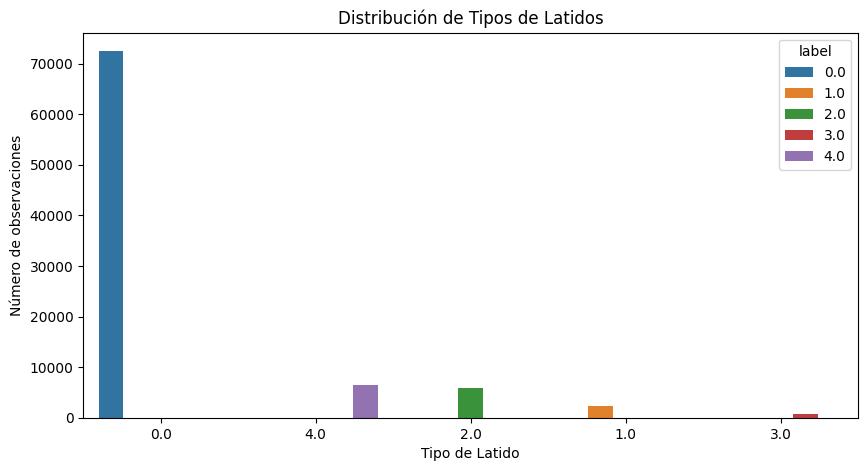

In [7]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df["label"], order=df["label"].value_counts().index, hue=df["label"])
plt.xlabel("Tipo de Latido")
plt.ylabel("Número de observaciones")
plt.title("Distribución de Tipos de Latidos")
plt.show();

## Distribuciones y correlaciones

In [ ]:
correlations = df.corr()

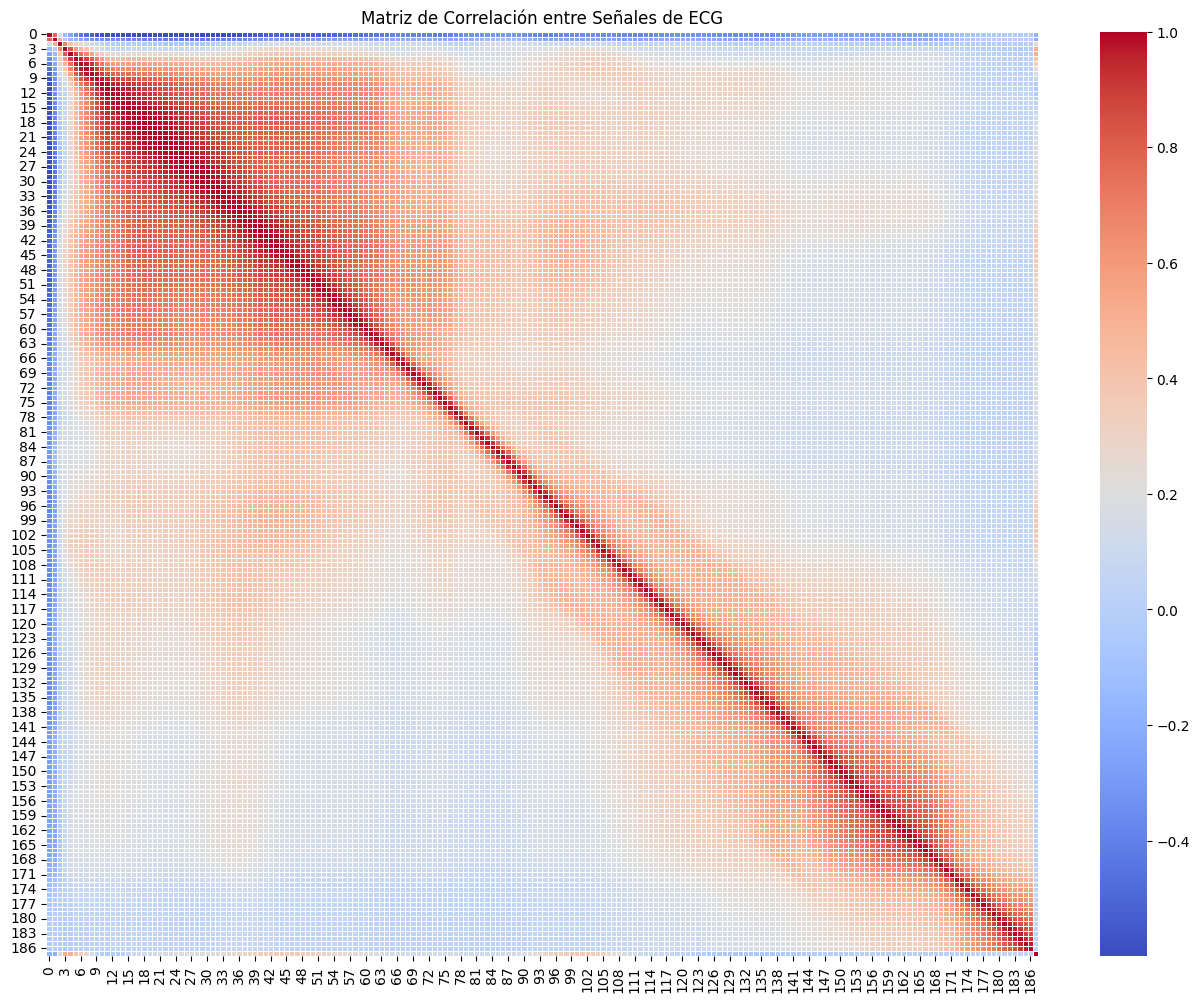

''

In [ ]:
plt.figure(figsize=(16, 12))
sns.heatmap(correlations, cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de Correlación entre Señales de ECG")
plt.show()
;

In [ ]:
correlations["label"].sort_values(ascending=False).head(15)

label    1.000000
3        0.508486
4        0.508453
5        0.408177
100      0.378922
99       0.376441
101      0.373843
98       0.366129
102      0.366069
44       0.364318
45       0.363609
43       0.362165
46       0.359167
42       0.357140
47       0.351472
Name: label, dtype: float64

In [ ]:
df.groupby("label")[3].describe()

count      mean       std       min       25%       50%       75%  \
label                                                                        
0.0    72471.0  0.177536  0.165603  0.000000  0.038462  0.131818  0.281046   
1.0     2223.0  0.089773  0.131052  0.000000  0.000000  0.031818  0.125384   
2.0     5788.0  0.418160  0.282487  0.000000  0.185513  0.317924  0.666667   
3.0      641.0  0.342783  0.187109  0.000000  0.229391  0.305062  0.402667   
4.0     6431.0  0.540759  0.162804  0.004049  0.426209  0.526923  0.670401   

            max  
label            
0.0    1.000000  
1.0    1.000000  
2.0    1.000000  
3.0    1.000000  
4.0    0.985965

Column:  3
Skew: 1.08
Kurtosis:  0.71


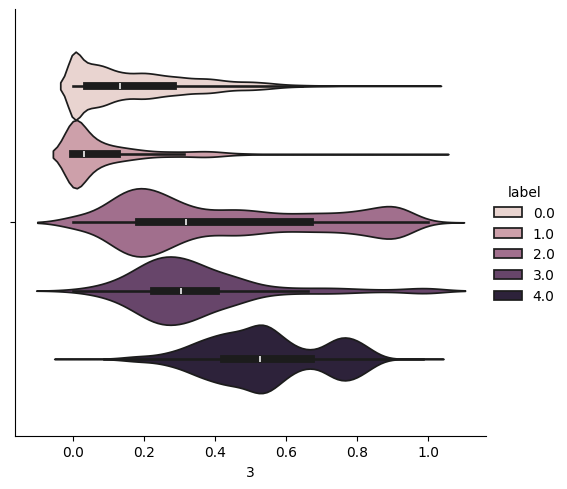

Column:  4
Skew: 1.58
Kurtosis:  2.5


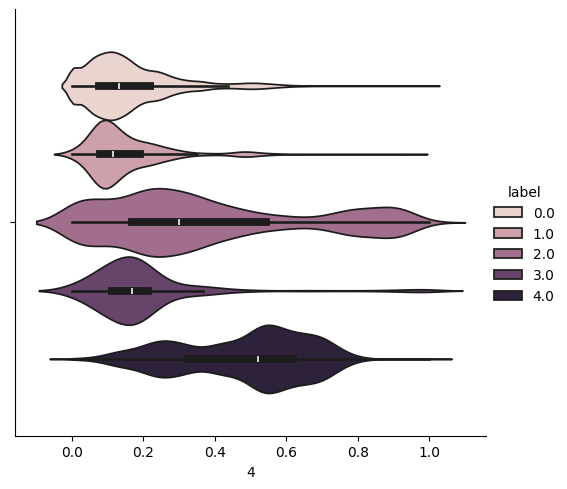

Column:  5
Skew: 1.39
Kurtosis:  1.85


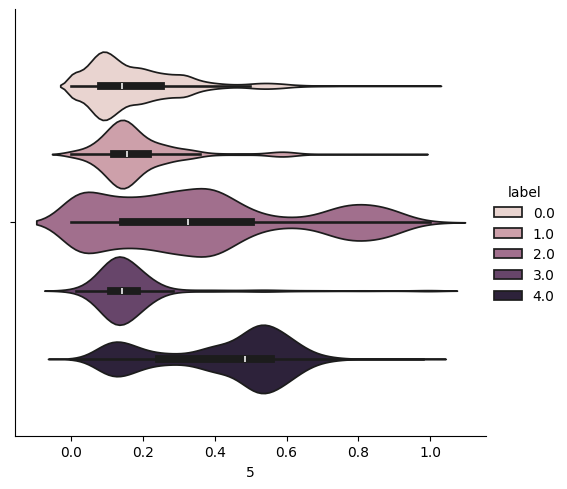

Column:  100
Skew: 1.42
Kurtosis:  1.35


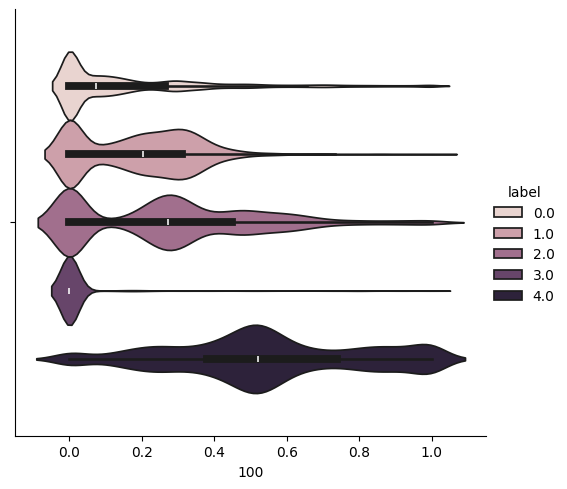

Column:  99
Skew: 1.41
Kurtosis:  1.36


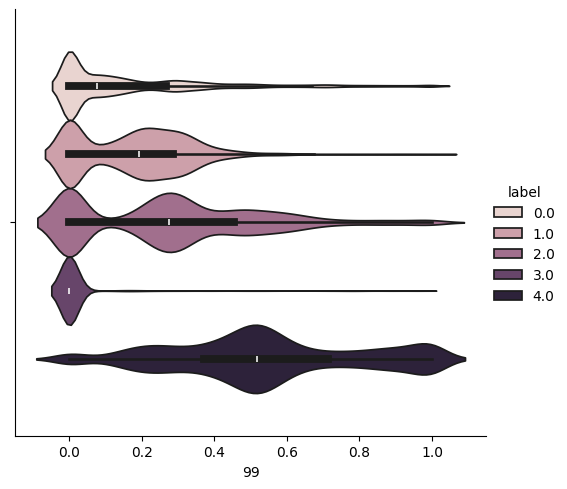

Column:  101
Skew: 1.44
Kurtosis:  1.37


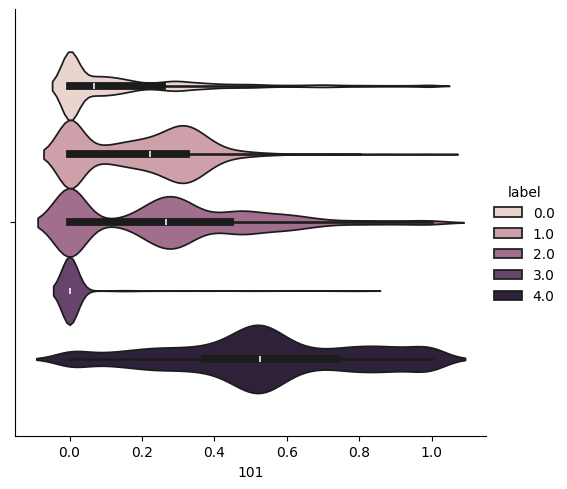

Column:  98
Skew: 1.41
Kurtosis:  1.42


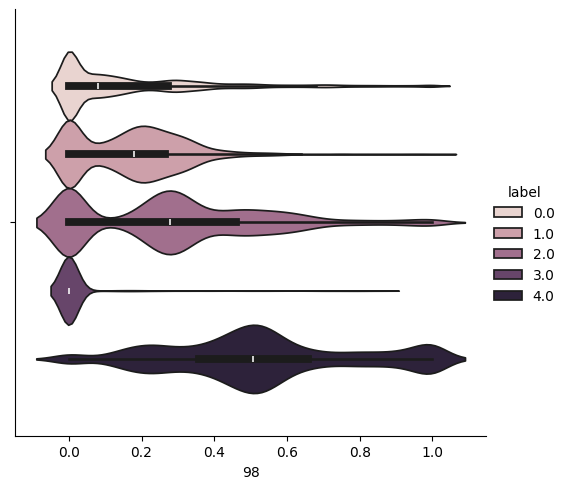

Column:  102
Skew: 1.46
Kurtosis:  1.41


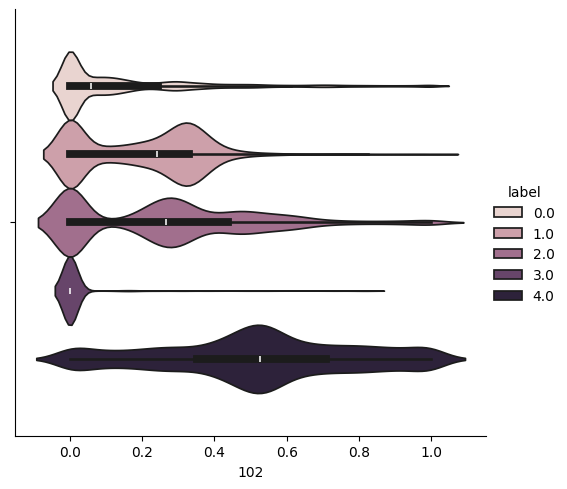

Column:  44
Skew: 1.11
Kurtosis:  0.92


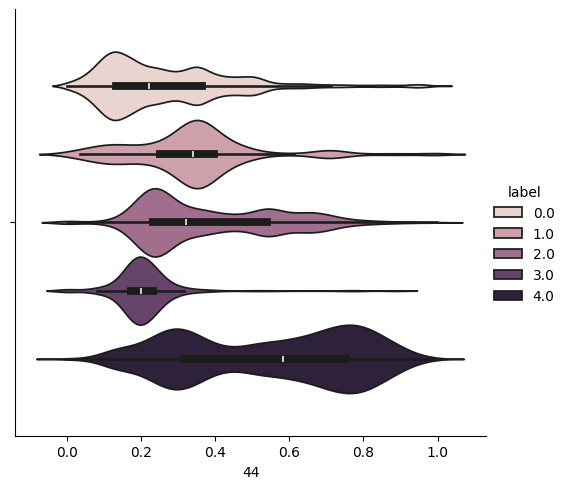

Column:  45
Skew: 1.11
Kurtosis:  0.96


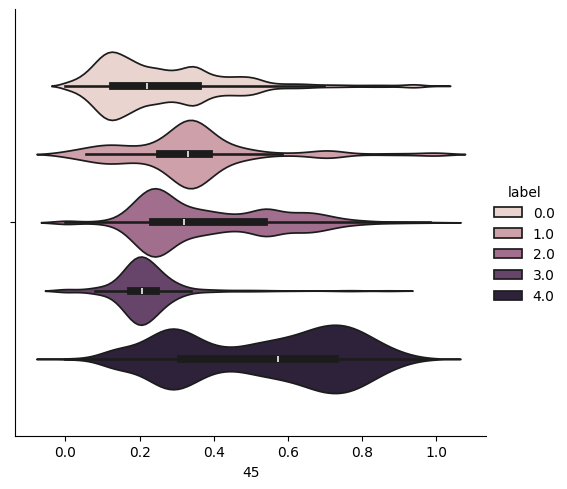

Column:  43
Skew: 1.11
Kurtosis:  0.9


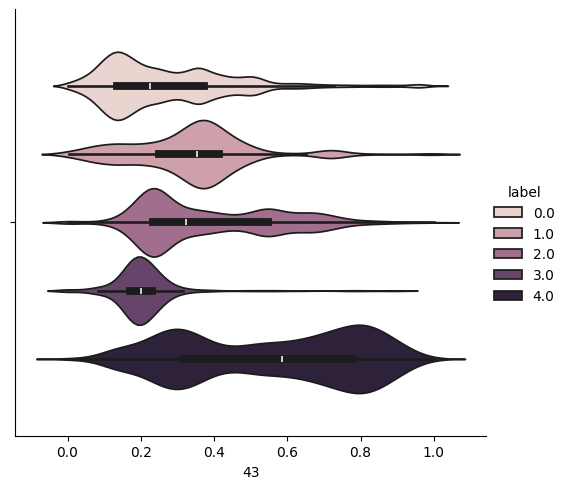

Column:  46
Skew: 1.1
Kurtosis:  1.0


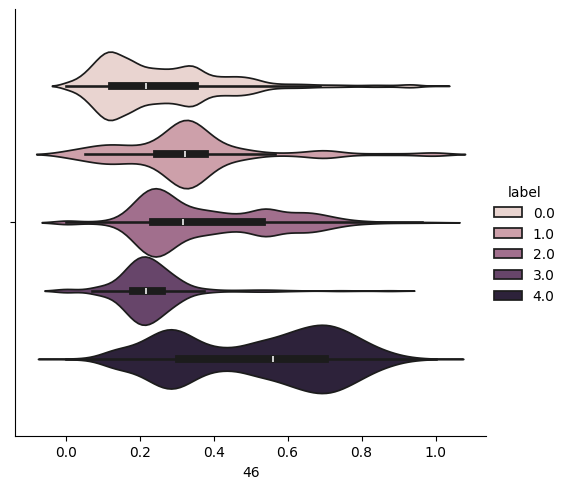

Column:  42
Skew: 1.11
Kurtosis:  0.89


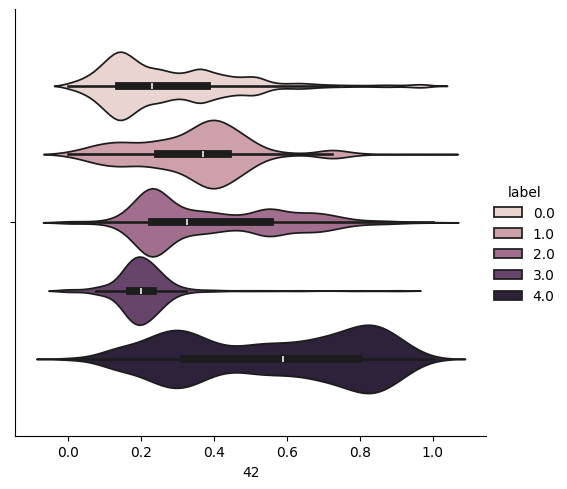

Column:  47
Skew: 1.09
Kurtosis:  1.01


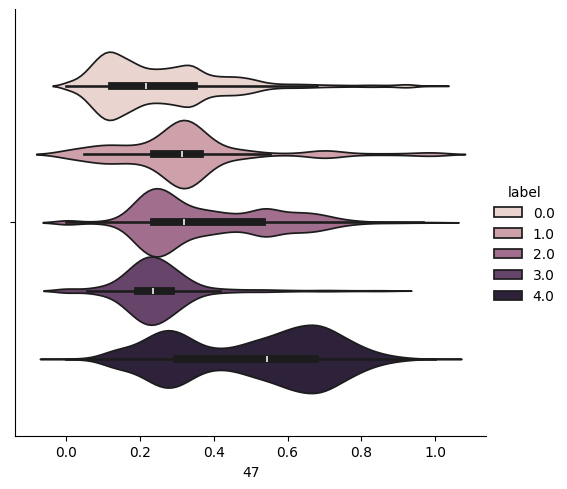

In [ ]:
columns = correlations["label"].sort_values(ascending=False).head(15).index[1:].values

for col in columns:
    print('Column: ', col)
    print('Skew:', round(df[col].skew(), 2))
    print('Kurtosis: ', round(df[col].kurtosis(), 2))
    sns.catplot(data=df, x=col, hue="label", kind="violin")
    plt.show()

In [ ]:
import scipy.stats as stats

classes = df['label'].unique()
col = 3

stat, p_value = stats.kruskal(*(df[df['label'] == c][3] for c in classes))
test_used = "Kruskal-Wallis"

print(f"Test utilizado: {test_used}")
print(f"Estadístico: {stat:.4f}, p-valor: {p_value:.4f}")

if p_value < 0.05:
    print("Diferencia estadísticamente significativa entre las clases.")
else:
    print("No hay evidencia suficiente para afirmar diferencia estadística entre clases.")

Test utilizado: Kruskal-Wallis
Estadístico: 17933.5488, p-valor: 0.0000
Diferencia estadísticamente significativa entre las clases.


array([0., 1., 2., 3.])

In [ ]:

classes = df['label'].unique()
classes = classes[:-1]
col = 3

stat, p_value = stats.kruskal(*(df[df['label'] == c][3] for c in classes))
test_used = "Kruskal-Wallis"

print(f"Test utilizado: {test_used}")
print(f"Estadístico: {stat:.4f}, p-valor: {p_value:.4f}")

if p_value < 0.05:
    print("Diferencia estadísticamente significativa entre las clases.")
else:
    print("No hay evidencia suficiente para afirmar diferencia estadística entre clases.")

Test utilizado: Kruskal-Wallis
Estadístico: 5946.2450, p-valor: 0.0000
Diferencia estadísticamente significativa entre las clases.


In [ ]:
X = df.iloc[:, :-1]
y = df["label"]

In [ ]:
pca3d = PCA(n_components=3)
X_pca3d = pca3d.fit_transform(X)

print(f"Varianza explicada por cada componente: {pca3d.explained_variance_ratio_}")
print(f"Varianza total explicada: {sum(pca3d.explained_variance_ratio_)}")

Varianza explicada por cada componente: [0.43509787 0.10661903 0.0714575 ]
Varianza total explicada: 0.6131743998093344


In [ ]:
import plotly.express as px
import pandas as pd

df_pca = pd.DataFrame(X_pca3d, columns=["PC1", "PC2", "PC3"])
df_pca["label"] = y

fig = px.scatter_3d(df_pca, x="PC1", y="PC2", z="PC3", color=df_pca["label"].astype(str),
                     title="PCA 3D",
                     labels={"color": "Tipo de Latido"}, opacity=0.7)

fig.show()